In [1]:
# Decision Tree Classifier with SciKit-Learn dataset and using bagging

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

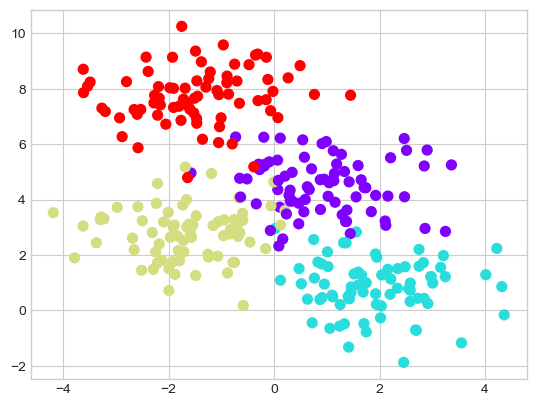

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

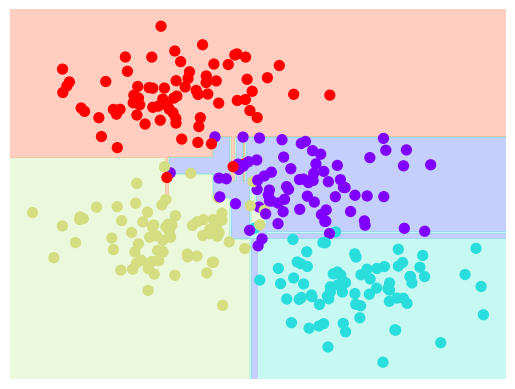

In [5]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # drawing training points of dataset
    ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Model fitting
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # graph
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)
    
    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(DecisionTreeClassifier(), X, y)

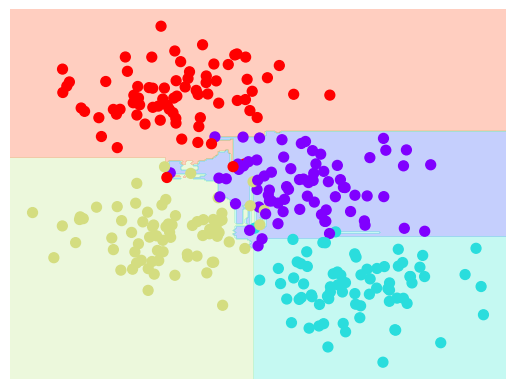

In [6]:
# Bagging - combining estimators to reduce the effects of overfitting

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=500, max_samples=0.8, 
                        random_state = 1) # Using 80% points of trained data)
bag.fit(X, y)

visualize_classifier(bag, X, y) 

In [7]:
# In practice, instead of bagging, a more effective method of decision tree randomization 
# is used—such an implementation is included in the random forest algorithm.